<a href="https://colab.research.google.com/github/qwertyz15/Analysis-of-the-social-dynamics-of-COVID-19/blob/main/LDA_bn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Configuration related preprocessing step before mounting the drive
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('Final Dataset NEWSPAPERBD.csv')

In [ ]:
data

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category
0,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 ho...,Nineteen people -- the highest number in 24 ho...,Statistics,NaN
1,https://www.thedailystar.net/country/news/thro...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...","Thrown out of job, Tangail’s chamcham makers p...",Around 1000 workers engaged in producing chamc...,As the chamcham shops are closed due to the lo...,COVID-19 Effects,Global economic impact of Corona virus
2,https://www.thedailystar.net/country/news/copi...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,Coping with Covid-19 Shutdown: 200 families re...,Family squabbles were becoming all too common ...,"The volunteer students, under the banner 'Sabu...",Social Information,Social impact
3,https://www.thedailystar.net/country/news/7-fa...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...","7 family members, 4 police personnel test posi...",At least eleven people tested positive for cor...,At least eleven people tested positive for cor...,COVID-19 Effects,Positive patient symptoms and identification
4,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,Coronavirus: Health ministry issues 13 directi...,In an effort to contain the spread of coronovi...,In an effort to contain the spread of coronovi...,Government Announcement and responses,"Government guidelines, instructions and mobili..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,Statistics,NaN
15561,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,International Information,Repatriation
15562,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 18:06:00,Narayanganj,Dhaka,Bangladesh,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ,Instructions to bring back the Bangladeshis tr...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,International Information,Repatriation
15563,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-26 18:01:00,Narayanganj,Dhaka,Bangladesh,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,Coronavirus: Control room opened in the Depart...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,Government Announcement and responses,"Government guidelines, instructions and mobili..."


In [ ]:
data.describe()

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category
count,15565,15565,15565,10861,15565,15565,15565,15565,15545,15438,15565,11903
unique,15564,6,11611,64,81,54,14575,14448,14660,14501,8,19
top,https://www.kalerkantho.com/online/national/20...,Bangladesh Pratidin,2020-05-16 00:00:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস আপডেট,coronavirus update,You Might Also Like\n\nYou Might Also Like\n\n...,,COVID-19 Effects,Strategic preparedness and response plan
freq,2,5584,1957,4155,6293,10861,21,21,3,20,4090,2276


# Separating English and Bengali Text + (Merging Titles and the Articles)

In [ ]:
df_Text = pd.read_csv('Text3.csv')

In [ ]:
df_Text

,Text_en,Text_bn
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা। স্বাস্থ্য...
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম..."
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -19 শাটডাউন মোকাবেলা: 200 পরিবার উদ্যানে...
3,"7 family members, 4 police personnel test posi...",বগুড়ার কোভিড -১৯ এর জন্য পরিবারের family সদস্...
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...
...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...


# Bengali Text Preprocessing

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import nltk
nltk.download('stopwords')
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'be', 'know', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','1','2','3','4','5','6','7','8','9','0'])
bengali_stop_words = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSPT8tmOhGa8G3uykbmYiGNPm8uE2mxiPiak4FHvbEWCwZHMg5xvD4Nun3Hxfo3Hf-_WO2RJvc6bqZh/pub?output=csv')
stop_words = bengali_stop_words['StopWords'].tolist()

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# # Import Dataset
# df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
# df = df.loc[df.target_names.isin(['soc.religion.christian', 'rec.sport.hockey', 'talk.politics.mideast', 'rec.motorcycles']) , :]
# print(df.shape)  #> (2361, 3)
# df.head()

In [ ]:
# def sent_to_words(sentences):
#     for sent in sentences:
#         sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
#         sent = re.sub('\s+', ' ', sent)  # remove newline chars
#         sent = re.sub("\'", "", sent)  # remove single quotes
#         sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
#         yield(sent)  

# # Convert to list
# data = df.content.values.tolist()
# data_words = list(sent_to_words(data))
# print(data_words[:1])
# # [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

In [ ]:
# type(data_words)

In [ ]:
# Dependencies
import gensim 
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
!pip install pyldavis
import pyLDAvis.gensim #LDA visualization library

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  
import string 
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
import warnings
warnings.simplefilter('ignore')
from itertools import chain

     |████████████████████████████████| 1.6MB 3.0MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=68a4808596d0577e3917778fd4721917d94303b2b841c943d80ebc03047a5b23
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import pickle
df_stemmed_bn = pd.read_pickle('df_stemmed_bn.pkl')

In [ ]:
df_stemmed_bn

,Text_en,Text_bn,text_en_clean,text_en_clean_2,text_en_clean_3,text_en_clean_4
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা। স্বাস্থ্য...,একদিন কোভিড এর সর্বোচ্চ সংখ্যা স্বাস্থ্য সেবা ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,"[সর্বোচ্চ, স্বাস্থ্য, অধিদপ্তর, মহাপরিচালক, ডি..."
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",চাকরি থেকে ছিটকে পড়ে টাঙ্গাইল চামচাম নির্মাতা...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,"[টাঙ্গাইল, চামচাম, নির্মাতা, প্রাদুর্ভাব, লকডা..."
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -19 শাটডাউন মোকাবেলা: 200 পরিবার উদ্যানে...,কোভিড শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা অর...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,"[শাটডাউন, মোকাবেলা, পরিবার, উদ্যান, সুবিধা, মা..."
3,"7 family members, 4 police personnel test posi...",বগুড়ার কোভিড -১৯ এর জন্য পরিবারের family সদস্...,বগুড়া কোভিড এর জন্য পরিবার সদস্য জন পুলিশ সদস...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,"[বগুড়া, পরিবার, পজিটিভ, পরীক্ষা, কমপক্ষ, বোগু..."
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,"[করোনাভাইরাস, স্বাস্থ্য, মন্ত্রনালয়, সরকারি, ..."
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,লাফিয় বাড়ছে আক্রান্ত ও মৃতের সংখ্যা চীনে করোনা...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,"[সংক্রমণ, নজিরবিহীন, প্রতিরোধমূলক, ব্যবস্থা, স..."
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,করোনাভাইরাস আতঙ্ক যাত্রী ফেরত দিয়েছে ভারত করোন...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,"[করোনাভাইরাস, যাত্রী, করোনাভাইরাস, পাসপোর্ট, ন..."
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয় আনার নির্দেশ ...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,"[নির্দেশ, প্রধানমন্ত্রী, হাসিনা, মারাত্মক, করো..."
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল রুম চা...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,"[করোনাভাইরাস, স্বাস্থ্য, অধিদপ্তর, কন্ট্রোল, ক..."


No need to clean it

In [ ]:
# # Clean the data
# stop = set(stopwords.words('english'))
# exclude = set(string.punctuation)
# lemma = WordNetLemmatizer()

# def clean(text):
#     cleanText = str(text)
#     cleanText = ' '.join([word for word in cleanText.split() if word not in stop_words])
#     cleanText = ''.join(ch for ch in cleanText if ch not in exclude)
#     cleanText = ' '.join([lemma.lemmatize(word) for word in cleanText.split()])
#     cleanText = ' '.join([word for word in cleanText.split() if len(word) > 5])
    
#     return cleanText.split()

# df_stemmed_bn['text_en_clean_4'] = df_stemmed_bn['text_en_clean_3'].apply(clean)


In [ ]:
df_stemmed_bn

,Text_en,Text_bn,text_en_clean,text_en_clean_2,text_en_clean_3,text_en_clean_4
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা। স্বাস্থ্য...,একদিন কোভিড এর সর্বোচ্চ সংখ্যা স্বাস্থ্য সেবা ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,"[সর্বোচ্চ, স্বাস্থ্য, অধিদপ্তর, মহাপরিচালক, ডি..."
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",চাকরি থেকে ছিটকে পড়ে টাঙ্গাইল চামচাম নির্মাতা...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,"[টাঙ্গাইল, চামচাম, নির্মাতা, প্রাদুর্ভাব, লকডা..."
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -19 শাটডাউন মোকাবেলা: 200 পরিবার উদ্যানে...,কোভিড শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা অর...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,"[শাটডাউন, মোকাবেলা, পরিবার, উদ্যান, সুবিধা, মা..."
3,"7 family members, 4 police personnel test posi...",বগুড়ার কোভিড -১৯ এর জন্য পরিবারের family সদস্...,বগুড়া কোভিড এর জন্য পরিবার সদস্য জন পুলিশ সদস...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,"[বগুড়া, পরিবার, পজিটিভ, পরীক্ষা, কমপক্ষ, বোগু..."
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,"[করোনাভাইরাস, স্বাস্থ্য, মন্ত্রনালয়, সরকারি, ..."
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,লাফিয় বাড়ছে আক্রান্ত ও মৃতের সংখ্যা চীনে করোনা...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,"[সংক্রমণ, নজিরবিহীন, প্রতিরোধমূলক, ব্যবস্থা, স..."
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,করোনাভাইরাস আতঙ্ক যাত্রী ফেরত দিয়েছে ভারত করোন...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,"[করোনাভাইরাস, যাত্রী, করোনাভাইরাস, পাসপোর্ট, ন..."
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয় আনার নির্দেশ ...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,"[নির্দেশ, প্রধানমন্ত্রী, হাসিনা, মারাত্মক, করো..."
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল রুম চা...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,"[করোনাভাইরাস, স্বাস্থ্য, অধিদপ্তর, কন্ট্রোল, ক..."


In [ ]:
import pickle
df_stemmed_bn.to_pickle('df_stemmed_bn_LDA.pkl')

In [ ]:
data_words = df_stemmed_bn['text_en_clean_4'].tolist()

In [ ]:
# Build the bigram and trigram models

# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # !python3 -m spacy download en  # run in terminal once
# def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
#     texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
#     texts = [bigram_mod[doc] for doc in texts]
#     texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
#     texts_out = []
#     nlp = spacy.load('en', disable=['parser', 'ner'])
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     # remove stopwords once more after lemmatization
#     texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
#     return texts_out

# data_ready = process_words(data_words)  # processed Text Data!
data_ready = data_words

In [ ]:
from gensim.models import CoherenceModel


# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]



number_of_topics = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
perplexity_values = []
coherence_values = []
for k in number_of_topics:
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=k, 
                                            random_state=89,
                                            update_every=1,
                                            passes=42,
                                            alpha='auto',
                                            per_word_topics=True)
  perplexity_values.append(lda_model.log_perplexity(corpus))
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=lda_model.id2word, coherence='c_v')
  coherence_values.append(coherence_model_lda.get_coherence())
  print(k)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
coherence_values

[0.47459957188783664,
 0.49708126336390085,
 0.46394710726728805,
 0.5007495967461042,
 0.5077398485358571,
 0.5028558555873908,
 0.4908878193502002,
 0.4662260725692695,
 0.4803411464716381,
 0.4824711757389743,
 0.4947286631495755,
 0.4838195376186729,
 0.4754689567375877,
 0.5028370095852206,
 0.4830531558578722,
 0.47852912294920696,
 0.4807834804712634,
 0.485182816323236,
 0.4768551886763917,
 0.4726877651967388,
 0.48244395385810945,
 0.4699487368468329,
 0.48508571786440663,
 0.47494980438007117,
 0.500582157150066,
 0.47958654172672904]

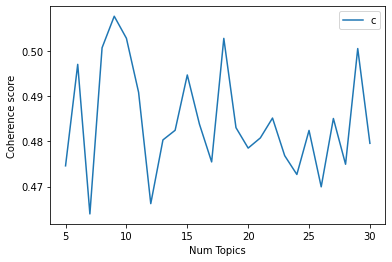

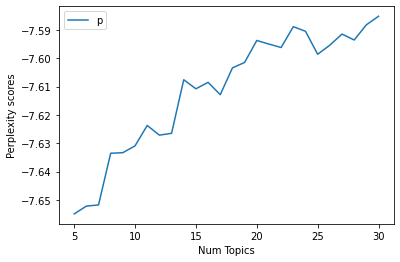

In [ ]:
import matplotlib.pyplot as plt

plt.plot(number_of_topics, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

plt.plot(number_of_topics, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity scores")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=89,
                                           update_every=1,
                                           passes=42,
                                           alpha='auto',
                                         #  iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"ব্যাংক" + 0.012*"প্রভাব" + 0.012*"অর্থনীতি" + 0.010*"সরবরাহ" + '
  '0.010*"সংস্থা" + 0.010*"অর্থনৈতিক" + 0.010*"আর্থিক" + 0.009*"সহায়তা" + '
  '0.008*"প্যাকেজ" + 0.007*"প্রকল্প"'),
 (1,
  '0.019*"ভাইরাস" + 0.017*"করোনাভাইরাস" + 0.012*"সংক্রমণ" + 0.010*"মার্কিন" + '
  '0.010*"মহামারী" + 0.008*"জানিয়েছেন" + 0.008*"স্বাস্থ্য" + 0.007*"সংস্থা" + '
  '0.007*"প্রাদুর্ভাব" + 0.006*"ব্যবস্থা"'),
 (2,
  '0.029*"ভাইরাস" + 0.025*"করোনাভাইরাস" + 0.011*"গবেষণা" + 0.010*"ভ্যাকসিন" + '
  '0.009*"সংস্থা" + 0.009*"সংক্রমণ" + 0.008*"প্রতিরোধ" + 0.006*"বিশেষজ্ঞ" + '
  '0.005*"বিজ্ঞানী" + 0.005*"সমস্যা"'),
 (3,
  '0.032*"শ্রমিক" + 0.024*"কারখানা" + 0.014*"বিক্রি" + 0.010*"জরিমানা" + '
  '0.009*"অভিযোগ" + 0.008*"কারাগার" + 0.008*"দূরত্ব" + 0.008*"ব্যবসায়ী" + '
  '0.008*"রাস্তা" + 0.007*"বিক্ষোভ"'),
 (4,
  '0.087*"হাসপাতাল" + 0.049*"পরীক্ষা" + 0.033*"চিকিৎসক" + 0.024*"স্বাস্থ্য" + '
  '0.024*"চিকিৎসা" + 0.021*"করোনাভাইরাস" + 0.021*"মেডিকেল" + 0.018*"আইইডিসিআর" '
  '+ 0.014*"পরিচালক" + 0.013

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.3456,"মৃত্যু, করোনাভাইরাস, সংক্রমণ, শনাক্ত, স্বাস্থ্...","[সর্বোচ্চ, স্বাস্থ্য, অধিদপ্তর, মহাপরিচালক, ডি..."
1,1,3.0,0.3071,"শ্রমিক, কারখানা, বিক্রি, জরিমানা, অভিযোগ, কারা...","[টাঙ্গাইল, চামচাম, নির্মাতা, প্রাদুর্ভাব, লকডা..."
2,2,0.0,0.3816,"ব্যাংক, প্রভাব, অর্থনীতি, সরবরাহ, সংস্থা, অর্থ...","[শাটডাউন, মোকাবেলা, পরিবার, উদ্যান, সুবিধা, মা..."
3,3,7.0,0.6231,"উপজেলা, ব্যক্তি, স্বাস্থ্য, করোনাভাইরাস, শনাক্...","[বগুড়া, পরিবার, পজিটিভ, পরীক্ষা, কমপক্ষ, বোগু..."
4,4,1.0,0.6093,"ভাইরাস, করোনাভাইরাস, সংক্রমণ, মার্কিন, মহামারী...","[করোনাভাইরাস, স্বাস্থ্য, মন্ত্রনালয়, সরকারি, ..."
5,5,4.0,0.2748,"হাসপাতাল, পরীক্ষা, চিকিৎসক, স্বাস্থ্য, চিকিৎসা...","[হাসিনা, মহিউদ্দিন, ইতিবাচক, পরীক্ষা, প্রয়াত,..."
6,6,1.0,0.3416,"ভাইরাস, করোনাভাইরাস, সংক্রমণ, মার্কিন, মহামারী...","[সুরক্ষা, নির্দেশনা, বঙ্গবাজার, করোনাভাইরাস, স..."
7,7,1.0,0.4346,"ভাইরাস, করোনাভাইরাস, সংক্রমণ, মার্কিন, মহামারী...","[করোনাভাইরাস, প্রাদুর্ভাব, সরবরাহ, মহামারী, বি..."
8,8,3.0,0.3169,"শ্রমিক, কারখানা, বিক্রি, জরিমানা, অভিযোগ, কারা...","[গাজীপুর, এক্সিকিউটিভ, ইঞ্জিনিয়ার, অবস্থায়, ..."
9,9,7.0,0.4971,"উপজেলা, ব্যক্তি, স্বাস্থ্য, করোনাভাইরাস, শনাক্...","[চাটোগ্রাম, পারিবারিক, পরীক্ষা, ইতিবাচক, পটিয়..."


In [ ]:
df_dominant_topic['Dominant_Topic'].unique()

array([6., 3., 0., 7., 1., 4., 5., 8., 2.])

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9282,"ব্যাংক, প্রভাব, অর্থনীতি, সরবরাহ, সংস্থা, অর্থনৈতিক, আর্থিক, সহায়তা, প্যাকেজ, প্রকল্প","[রঙগুলি, ইলেক্ট্রনিক্স, করনিভাইরাস, মহামারীকালীন, রঙগুলি, বৈদ্যুতিন, দিচ্ছে, গ্রাহক, বিজ্ঞপ্তি, ..."
1,1.0,0.9965,"ভাইরাস, করোনাভাইরাস, সংক্রমণ, মার্কিন, মহামারী, জানিয়েছেন, স্বাস্থ্য, সংস্থা, প্রাদুর্ভাব, ব্যব...","[মার্কিন, করোনাভাইরাস, রাজনৈতিক, মার্কিন, করোনাভাইরাস, রাজনৈতিক, মার্কিন, করোনাভাইরাস, রাজনৈতিক,..."
2,2.0,0.9750,"ভাইরাস, করোনাভাইরাস, গবেষণা, ভ্যাকসিন, সংস্থা, সংক্রমণ, প্রতিরোধ, বিশেষজ্ঞ, বিজ্ঞানী, সমস্যা","[যুক্তরাজ্য, অক্সফোর্ড, বিশ্ববিদ্যালয়, বিজ্ঞানী, প্রাণঘাতী, ভাইরাস, প্রতিষেধক, সম্ভাবনা, ব্রিটিশ..."
3,3.0,0.9611,"শ্রমিক, কারখানা, বিক্রি, জরিমানা, অভিযোগ, কারাগার, দূরত্ব, ব্যবসায়ী, রাস্তা, বিক্ষোভ","[আশুলিয়া, গাজীপুর, শ্রমিক, বিক্ষোভ, ভাঙচুর, আশুলিয়া, কারখানা, শ্রমিক, শনিবার, বিক্ষোভ, বিক্ষুব্ধ..."
4,4.0,0.9793,"হাসপাতাল, পরীক্ষা, চিকিৎসক, স্বাস্থ্য, চিকিৎসা, করোনাভাইরাস, মেডিকেল, আইইডিসিআর, পরিচালক, অধিদপ্তর","[গণস্বাস্থ্য, পরীক্ষা, বিএসএমএমইউ, অনুমতি, গণস্বাস্থ্য, কেন্দ্র, উদ্ভাবিত, করোনাভাইরাস, শনাক্ত, ..."
5,5.0,0.9762,"ফ্লাইট, যাত্রী, নাগরিক, বিমানবন্দর, আন্তর্জাতিক, প্রবাসী, কর্তৃপক্ষ, সিঙ্গাপুর, লকডাউন, প্রবেশ","[ফ্লাইট, আমিরাত, সিঙ্গাপুর, ফ্লাইট, শনিবার, ফ্লাইট, সিঙ্গাপুর, ব্যবস্থাপনা, পরিচালক, প্রধান, নির..."
6,6.0,0.9862,"মৃত্যু, করোনাভাইরাস, সংক্রমণ, শনাক্ত, স্বাস্থ্য, ভাইরাস, যুক্তরাষ্ট্র, বুলেটিন, প্রাণঘাতী, পরীক্ষা","[করোনাভাইরাস, মৃত্যু, বিপর্যস্ত, বসিয়েছ, প্রাণঘাতী, ভাইরাস, উৎপত্তি, ভাইরাস, মহামারী, তাণ্ডব, চা..."
7,7.0,0.9916,"উপজেলা, ব্যক্তি, স্বাস্থ্য, করোনাভাইরাস, শনাক্ত, কর্মকর্তা, পরিবার, হাসপাতাল, লকডাউন, সংগ্রহ","[নাঙ্গলকোট, করোনাভাইরাস, কুমিল্লা, নাঙ্গলকোট, শনাক্ত, উপজেলা, দাঁড়াল, স্থানীয়, স্বাস্থ্য, শনাক্ত..."
8,8.0,0.9835,"করোনাভাইরাস, পরিস্থিতি, ব্যবস্থা, প্রধানমন্ত্রী, সহায়তা, মন্ত্রণালয়, সিদ্ধান্ত, নির্দেশনা, সংক্র...","[কনফারেন্স, প্রধানমন্ত্রী, শুভেচ্ছা, বিনিময়, আওয়ামী, সভাপতি, প্রধানমন্ত্রী, হাসিনা, কনফারেন্স, স..."


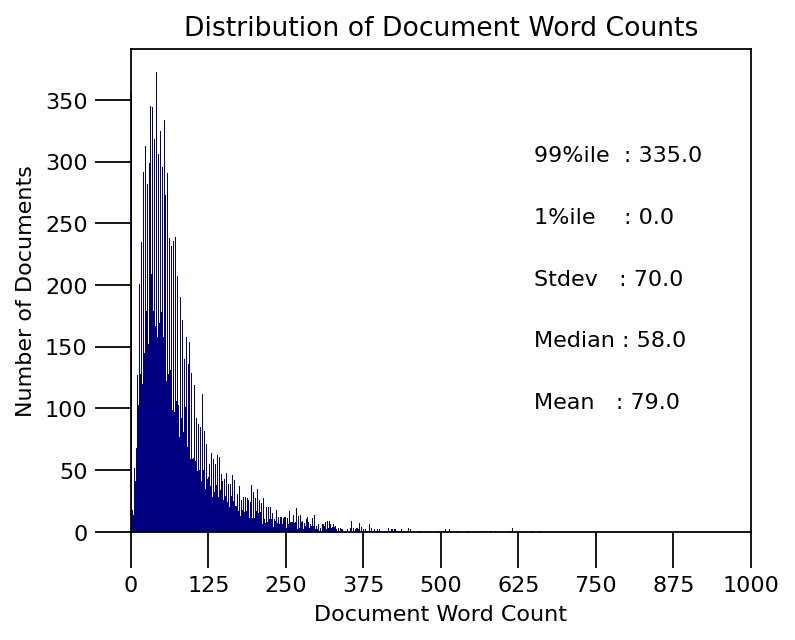

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(5,4), dpi=160)
plt.hist(doc_lens, bins = 500, color='navy')
plt.text(650, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(650,  150, "Median : " + str(round(np.median(doc_lens))))
plt.text(650,  200, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(650,  250, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(650,  300, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=12))
plt.savefig('Distribution of Document Word Counts.png')
plt.show()

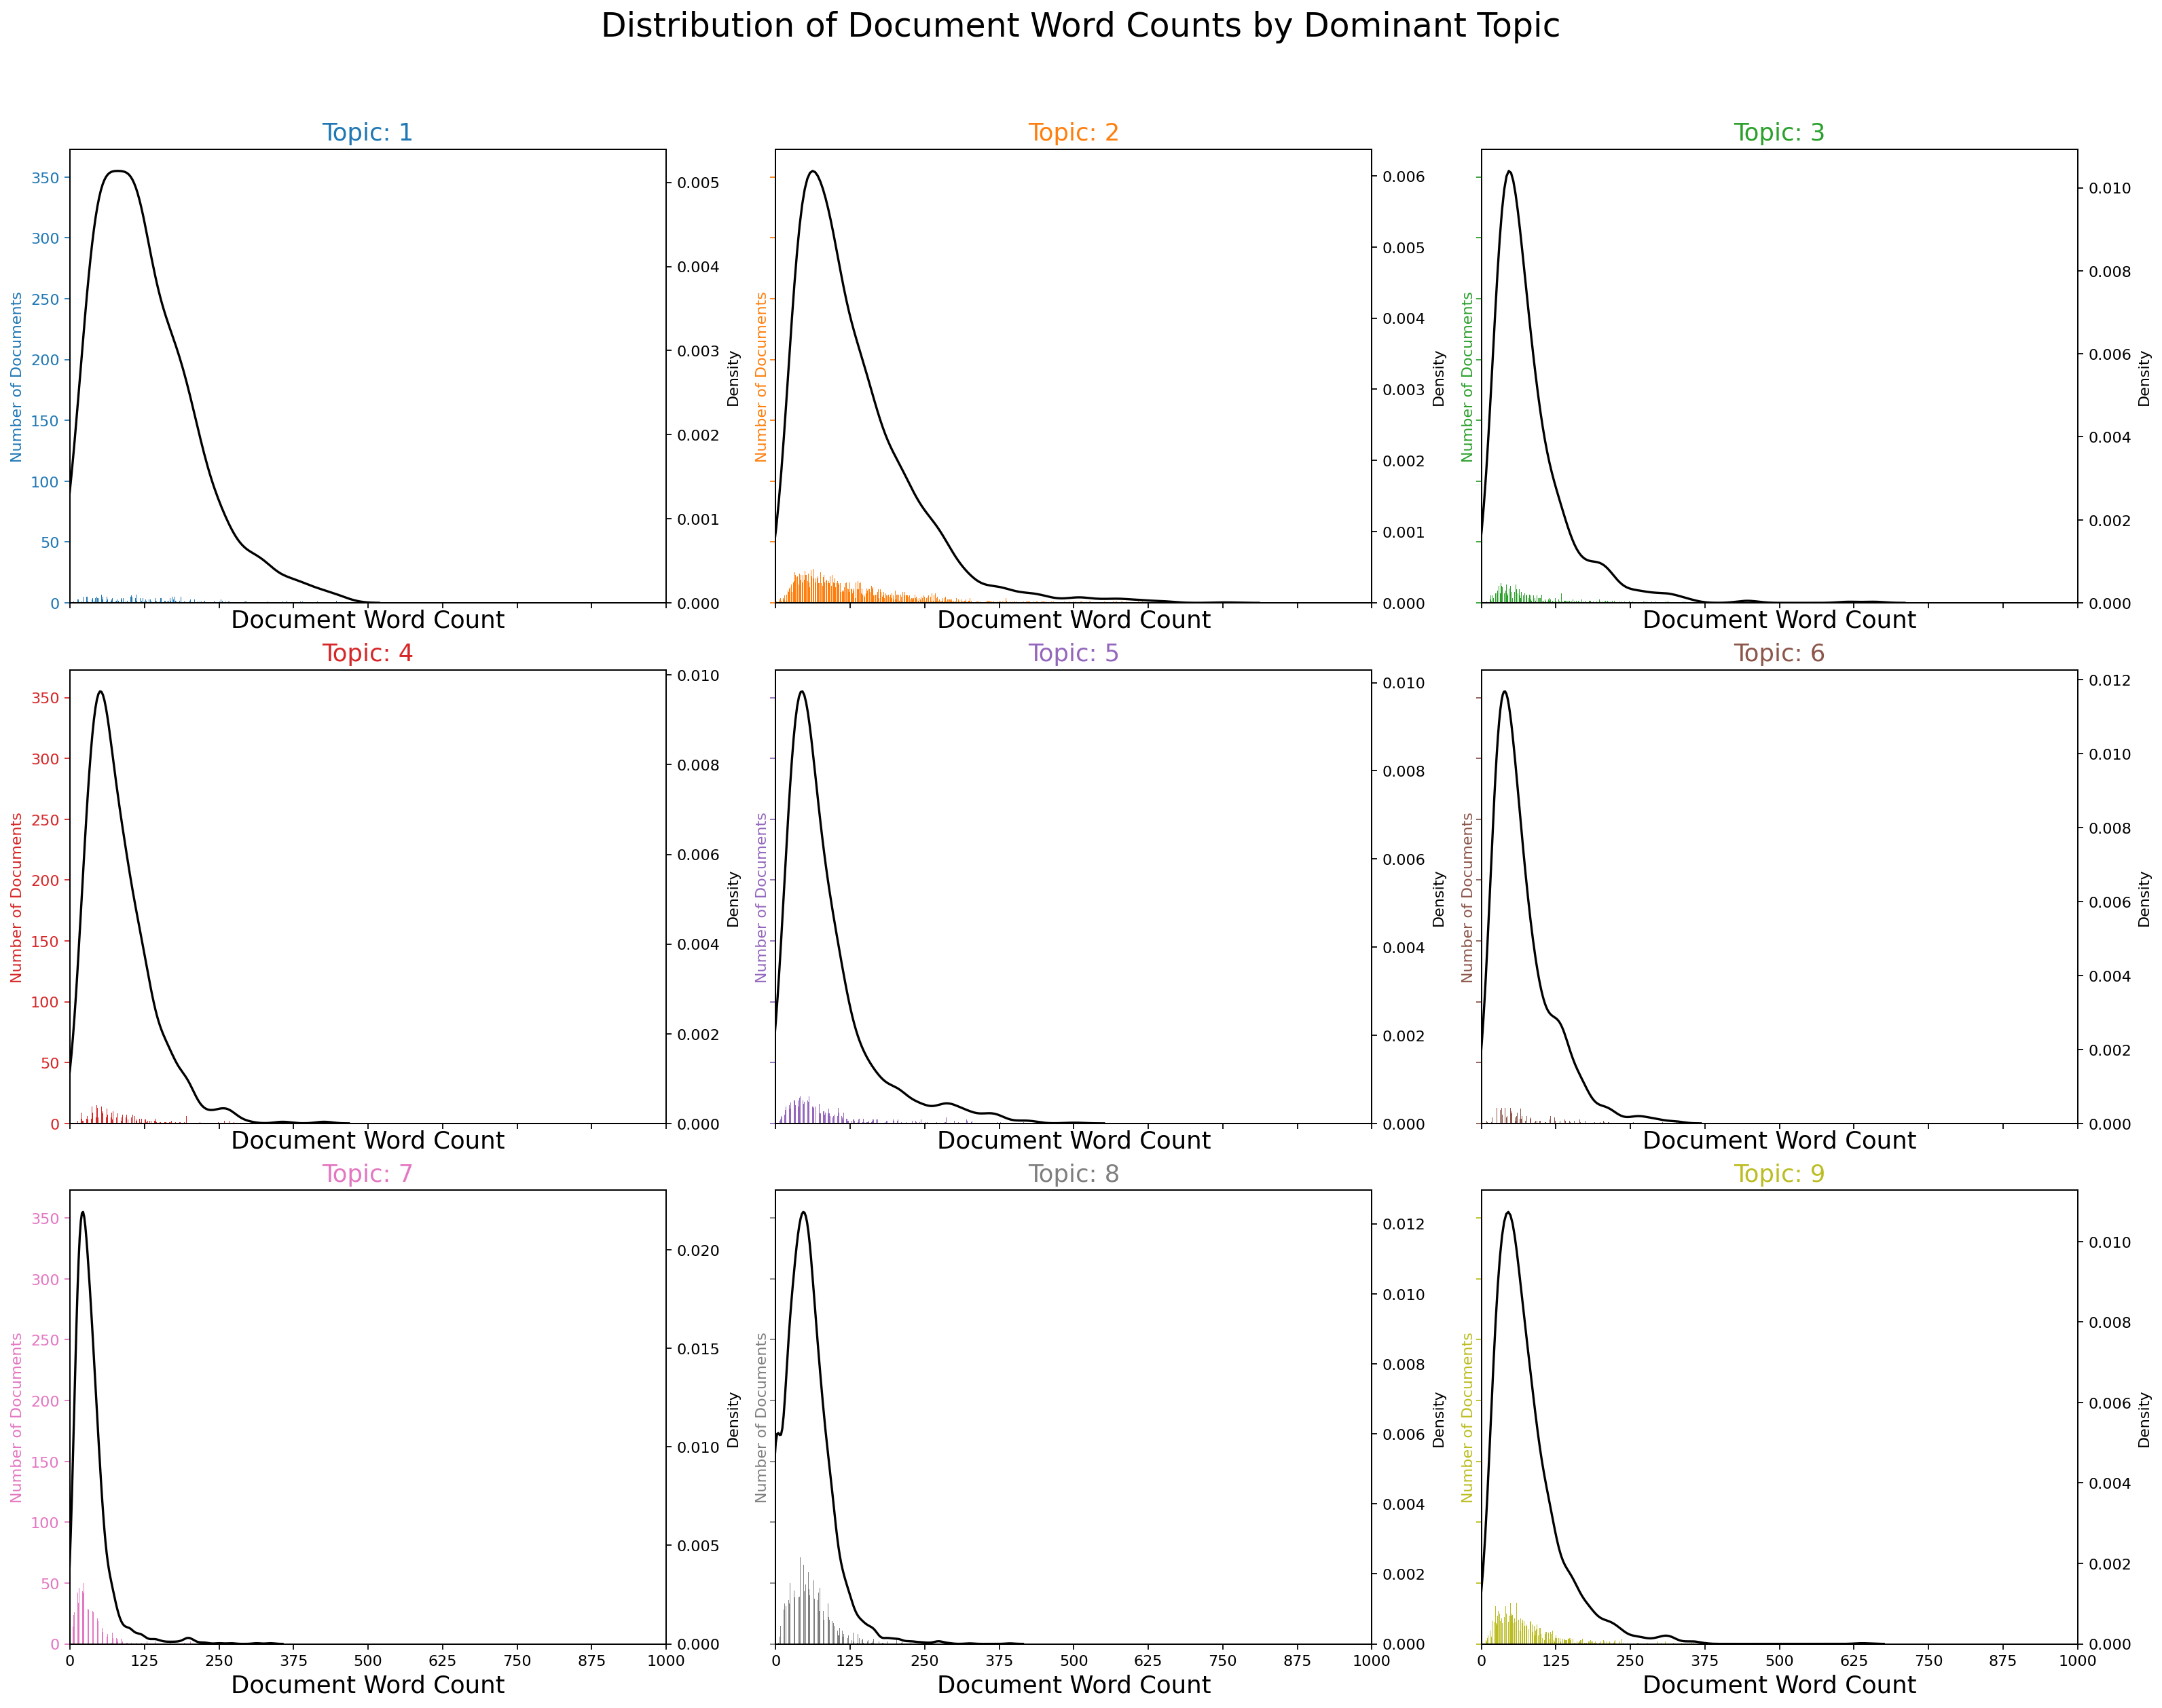

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
mycolors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
# more colors: 'mcolors.XKCD_COLORS'
mycolors = mycolors + mycolors2
cols = mycolors
fig, axes = plt.subplots(3,3,figsize=(20,16), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000,color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_xlabel('Document Word Count', fontsize=16)
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i+1), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()
fig.savefig('Distribution of Document Word Counts by Dominant Topic.png')

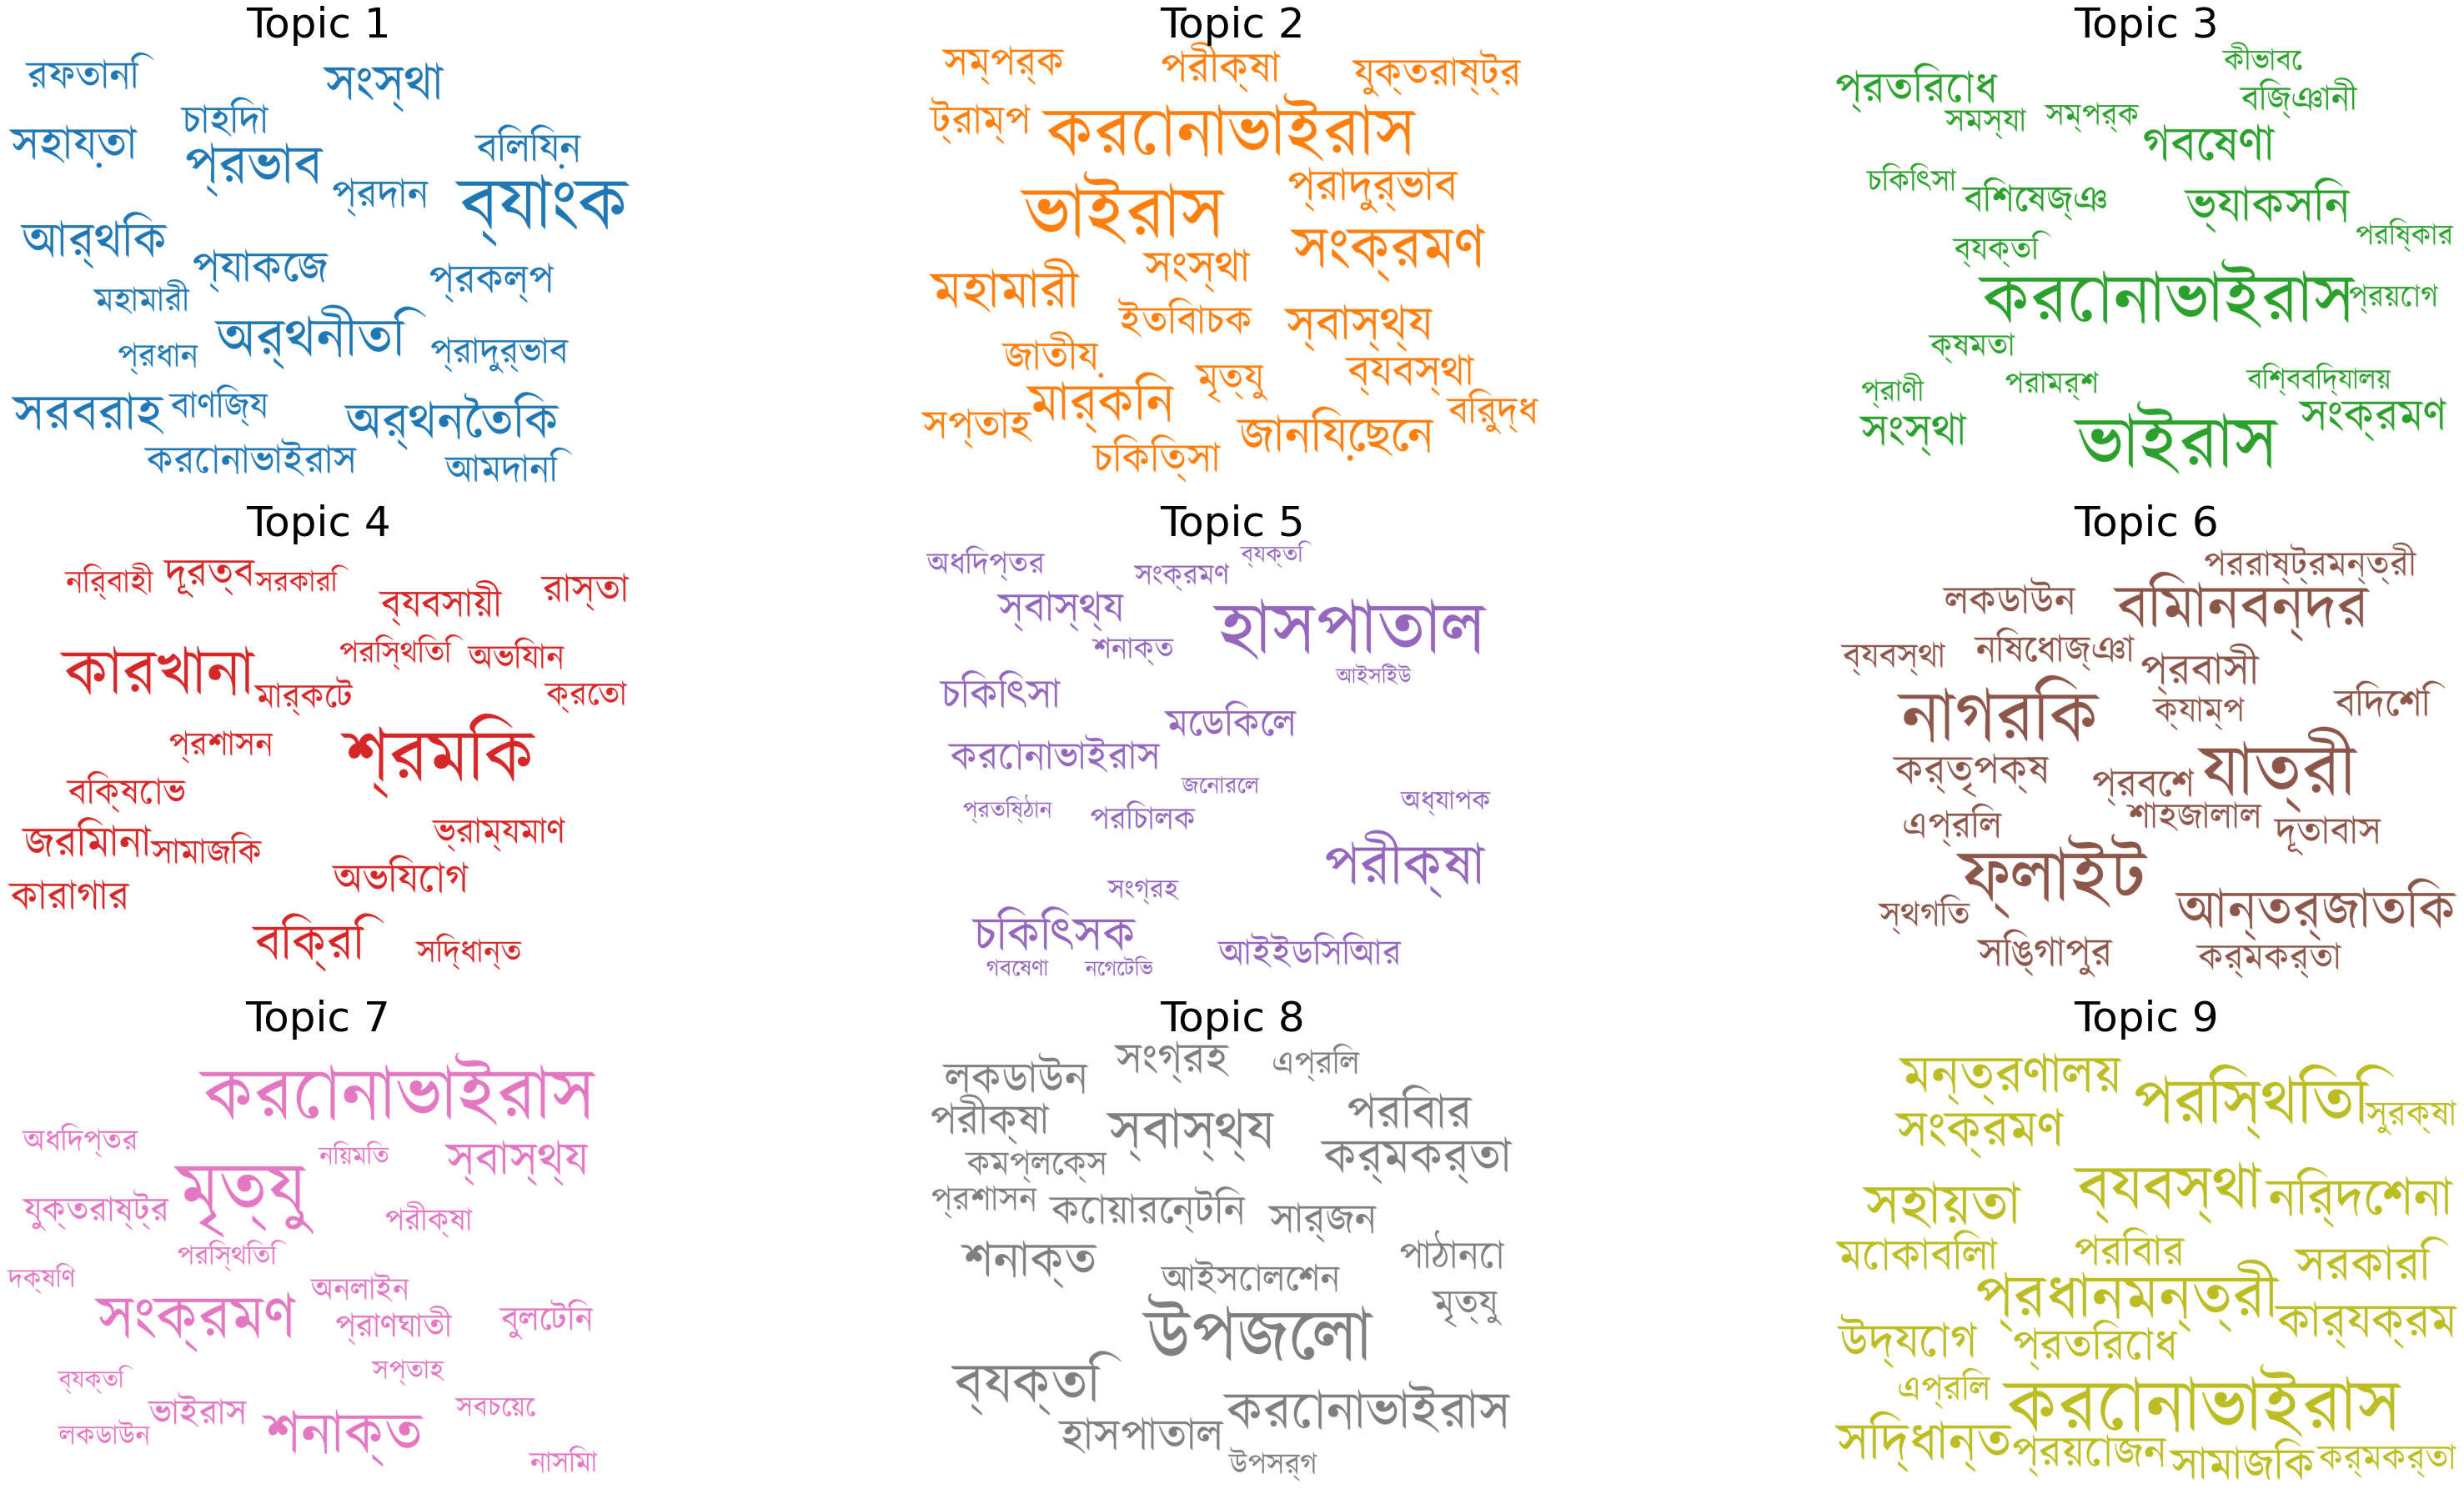

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
mycolors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
# more colors: 'mcolors.XKCD_COLORS'
mycolors = mycolors + mycolors2
cols = mycolors
myfontpath='/content/drive/My Drive/TTf Files/kalpurush.ttf'

cloud = WordCloud(stopwords=stop_words,
                  font_path = myfontpath,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=9, num_words=50, log=False, formatted=False)

fig, axes = plt.subplots(3,3, figsize=(50,25), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=50))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
fig.savefig('Word Cloud.png')

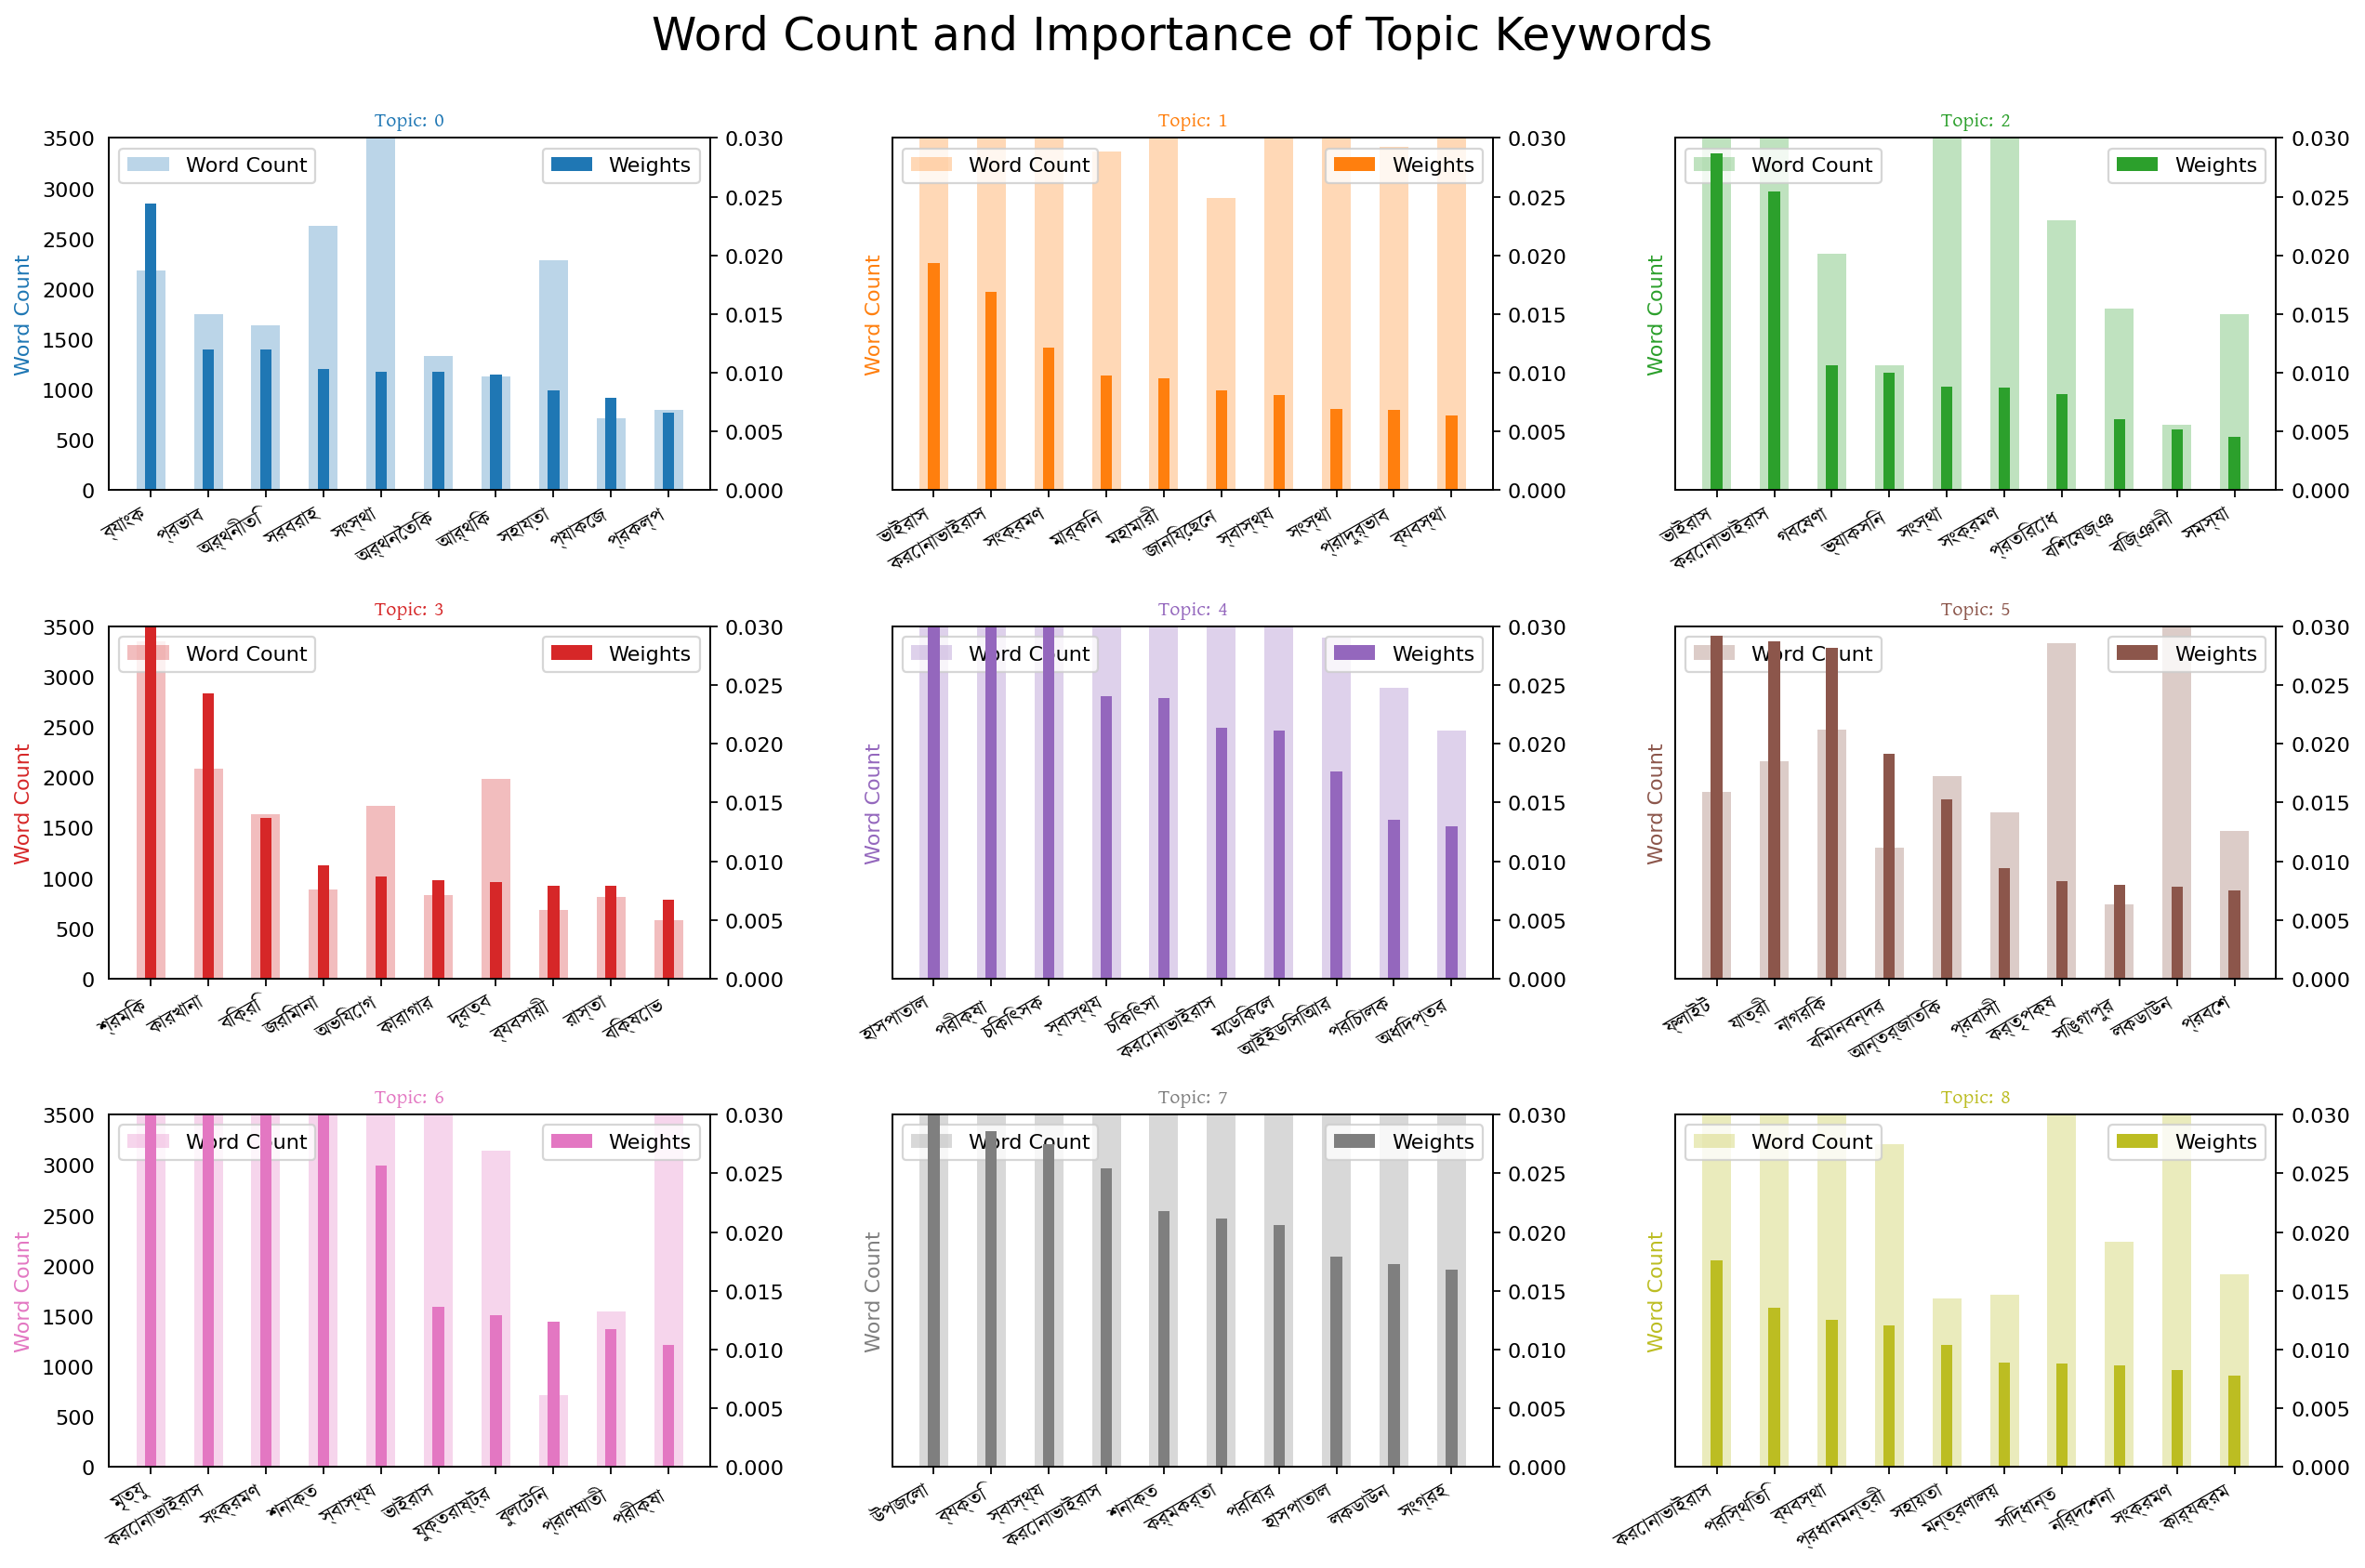

In [ ]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
import matplotlib.pyplot as plt
from collections import Counter
#topics = lda_model.show_topics(formatted=False)
topics = lda_model.show_topics(num_topics=9, num_words=10, log=False, formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)


out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
mycolors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
# more colors: 'mcolors.XKCD_COLORS'
mycolors = mycolors + mycolors2
cols = mycolors
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16,fontproperties=prop)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right',fontproperties=prop)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()
fig.savefig('Word Count & Importance of Topic Keywords.png')

In [ ]:
topics

[(0,
  [('ব্যাংক', 0.024419352),
   ('প্রভাব', 0.012026277),
   ('অর্থনীতি', 0.011966332),
   ('সরবরাহ', 0.010319932),
   ('সংস্থা', 0.010124551),
   ('অর্থনৈতিক', 0.010068726),
   ('আর্থিক', 0.0098231295),
   ('সহায়তা', 0.00853196),
   ('প্যাকেজ', 0.007846015),
   ('প্রকল্প', 0.006574035)]),
 (1,
  [('ভাইরাস', 0.019347368),
   ('করোনাভাইরাস', 0.016898632),
   ('সংক্রমণ', 0.012140134),
   ('মার্কিন', 0.009739086),
   ('মহামারী', 0.009541764),
   ('জানিয়েছেন', 0.008478411),
   ('স্বাস্থ্য', 0.008079918),
   ('সংস্থা', 0.0069472147),
   ('প্রাদুর্ভাব', 0.006843444),
   ('ব্যবস্থা', 0.006343535)]),
 (2,
  [('ভাইরাস', 0.028655034),
   ('করোনাভাইরাস', 0.025431028),
   ('গবেষণা', 0.010611804),
   ('ভ্যাকসিন', 0.010045387),
   ('সংস্থা', 0.00883912),
   ('সংক্রমণ', 0.0087470785),
   ('প্রতিরোধ', 0.008195912),
   ('বিশেষজ্ঞ', 0.0060168523),
   ('বিজ্ঞানী', 0.005163107),
   ('সমস্যা', 0.004544911)]),
 (3,
  [('শ্রমিক', 0.032368477),
   ('কারখানা', 0.024309423),
   ('বিক্রি', 0.013716753),
   

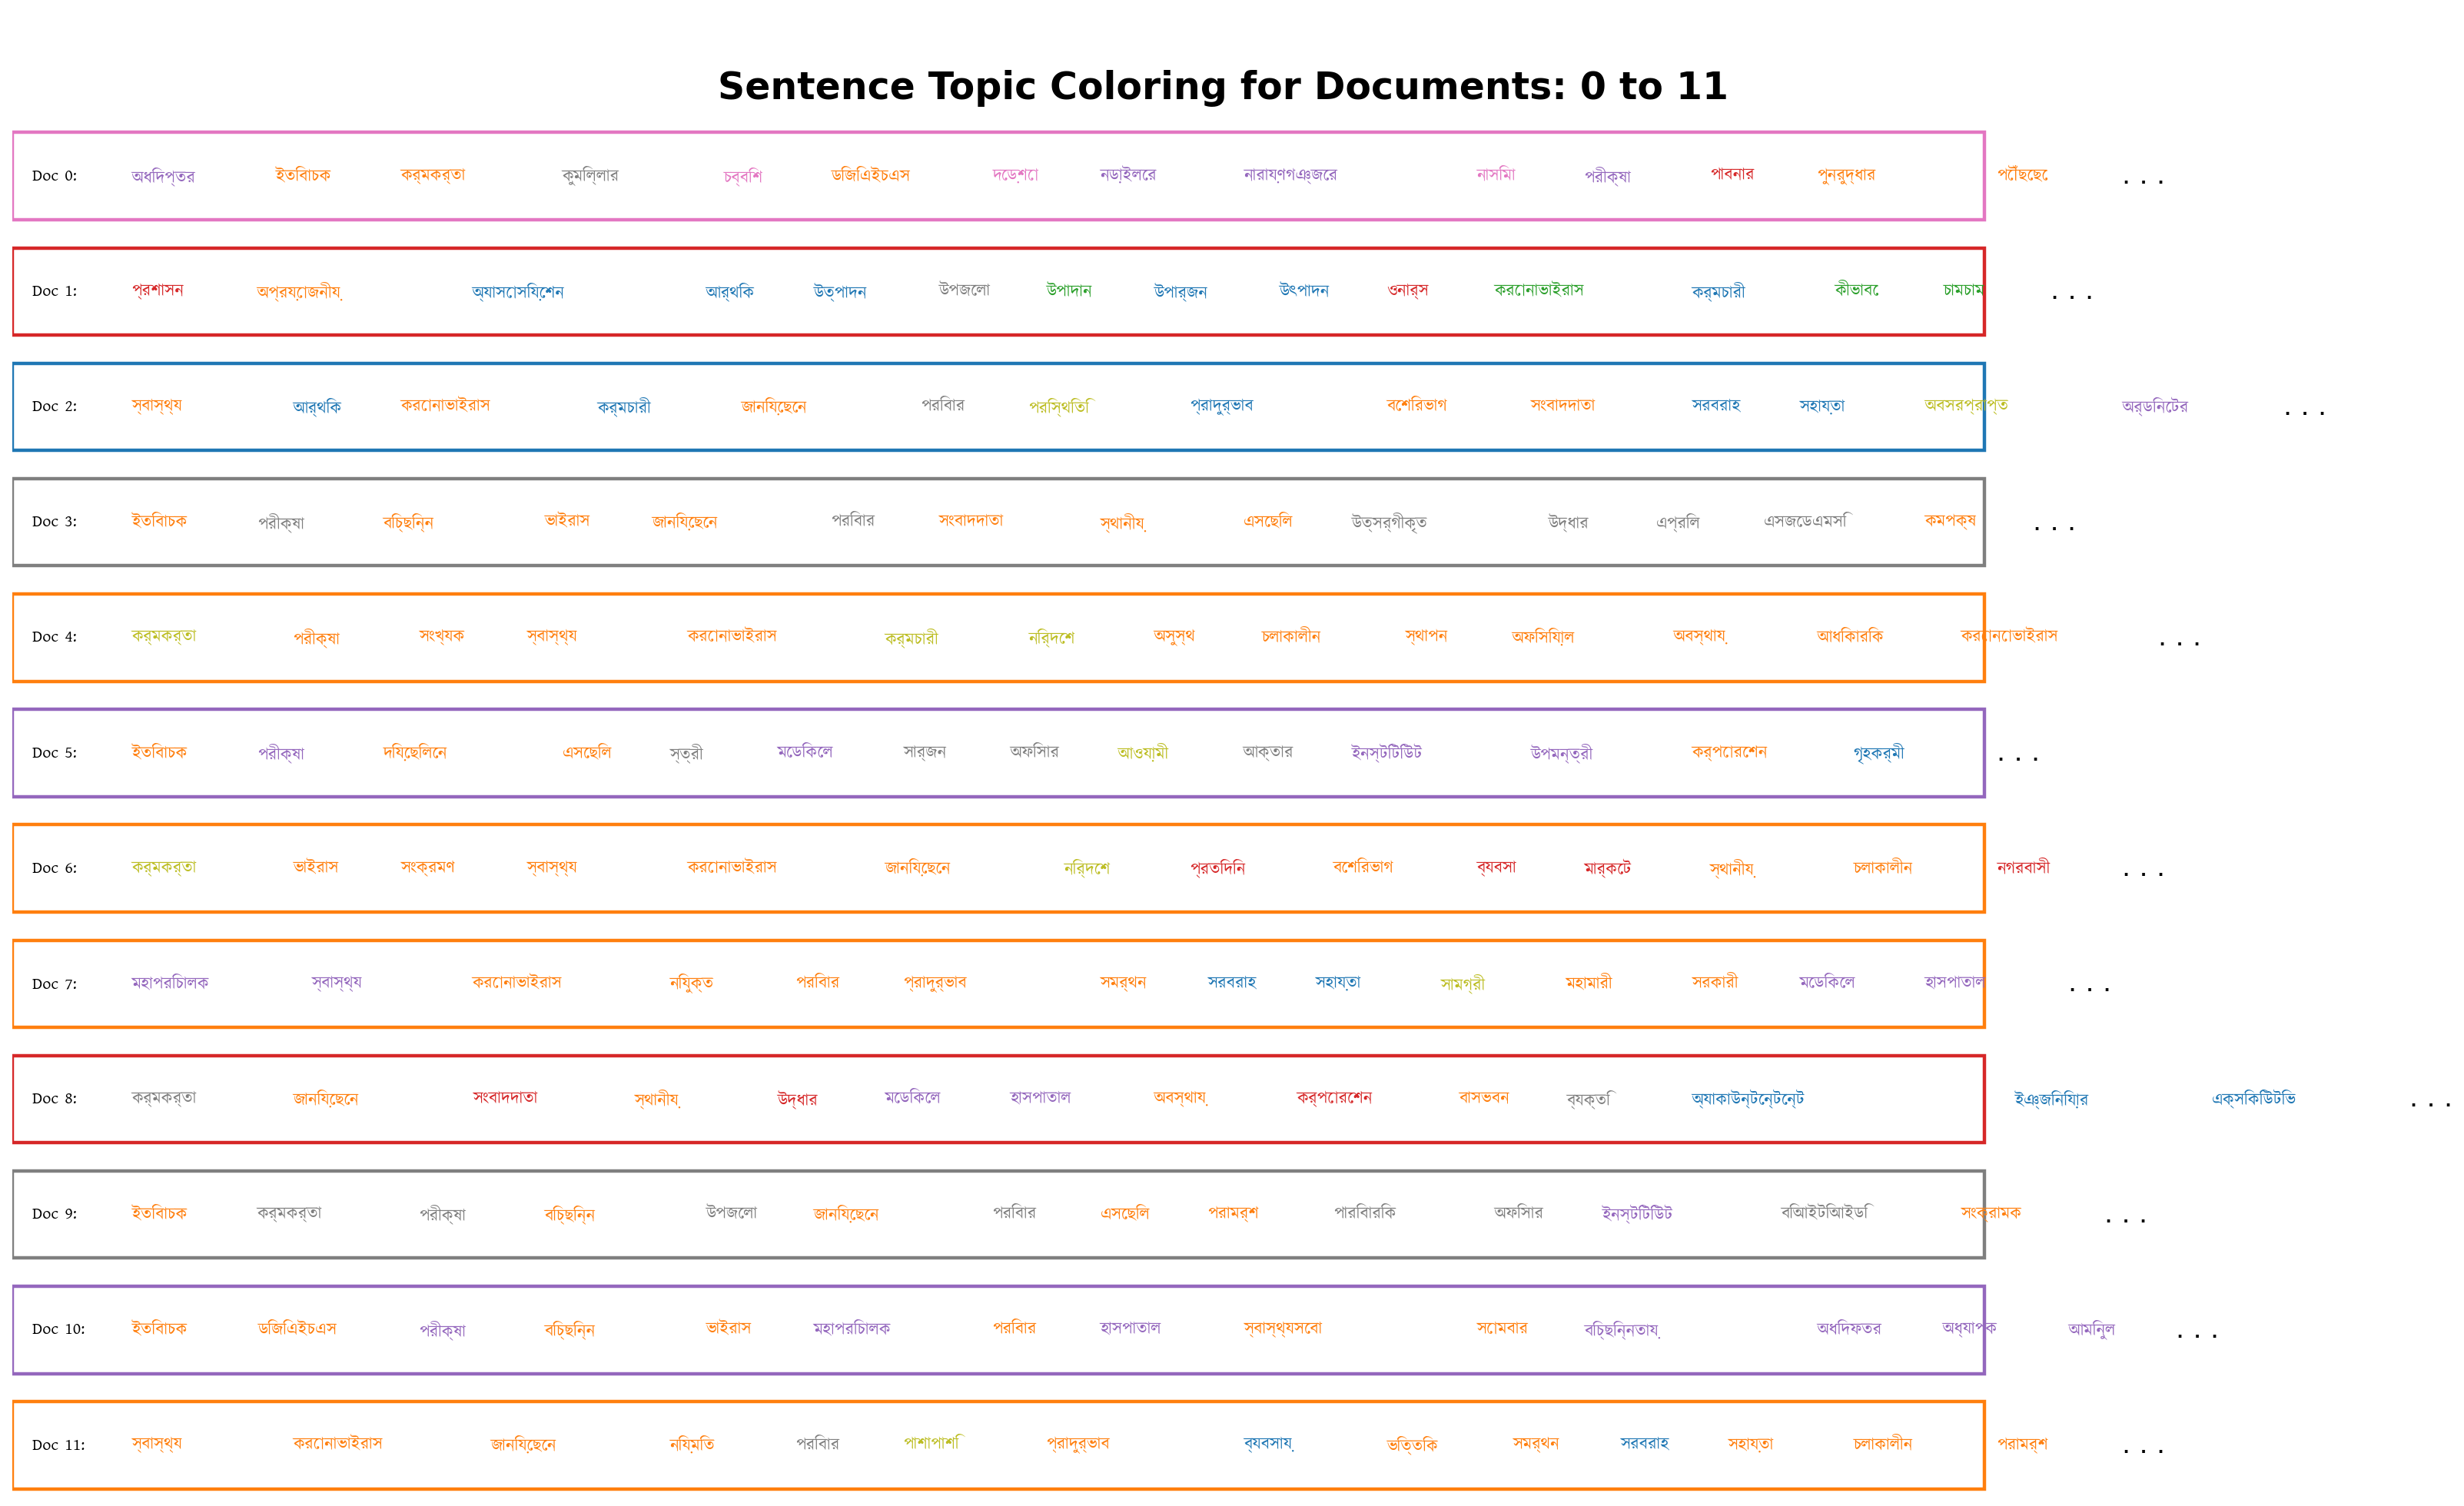

In [ ]:
# Sentence Coloring of N Sentences
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
from matplotlib.patches import Rectangle
myfontpath = 'kalpurush.ttf'
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    mycolors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
  # more colors: 'mcolors.XKCD_COLORS'
    mycolors = mycolors + mycolors2

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700,fontproperties = prop)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2,))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=24, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=1000,fontproperties = prop)
                          
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.savefig('Sentence Topic Coloring for Documents.png')
    plt.show()
    #plt.savefig('Sentence Topic Coloring for Documents.png')
sentences_chart()    


In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(num_topics=9, num_words=10, log=False, formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

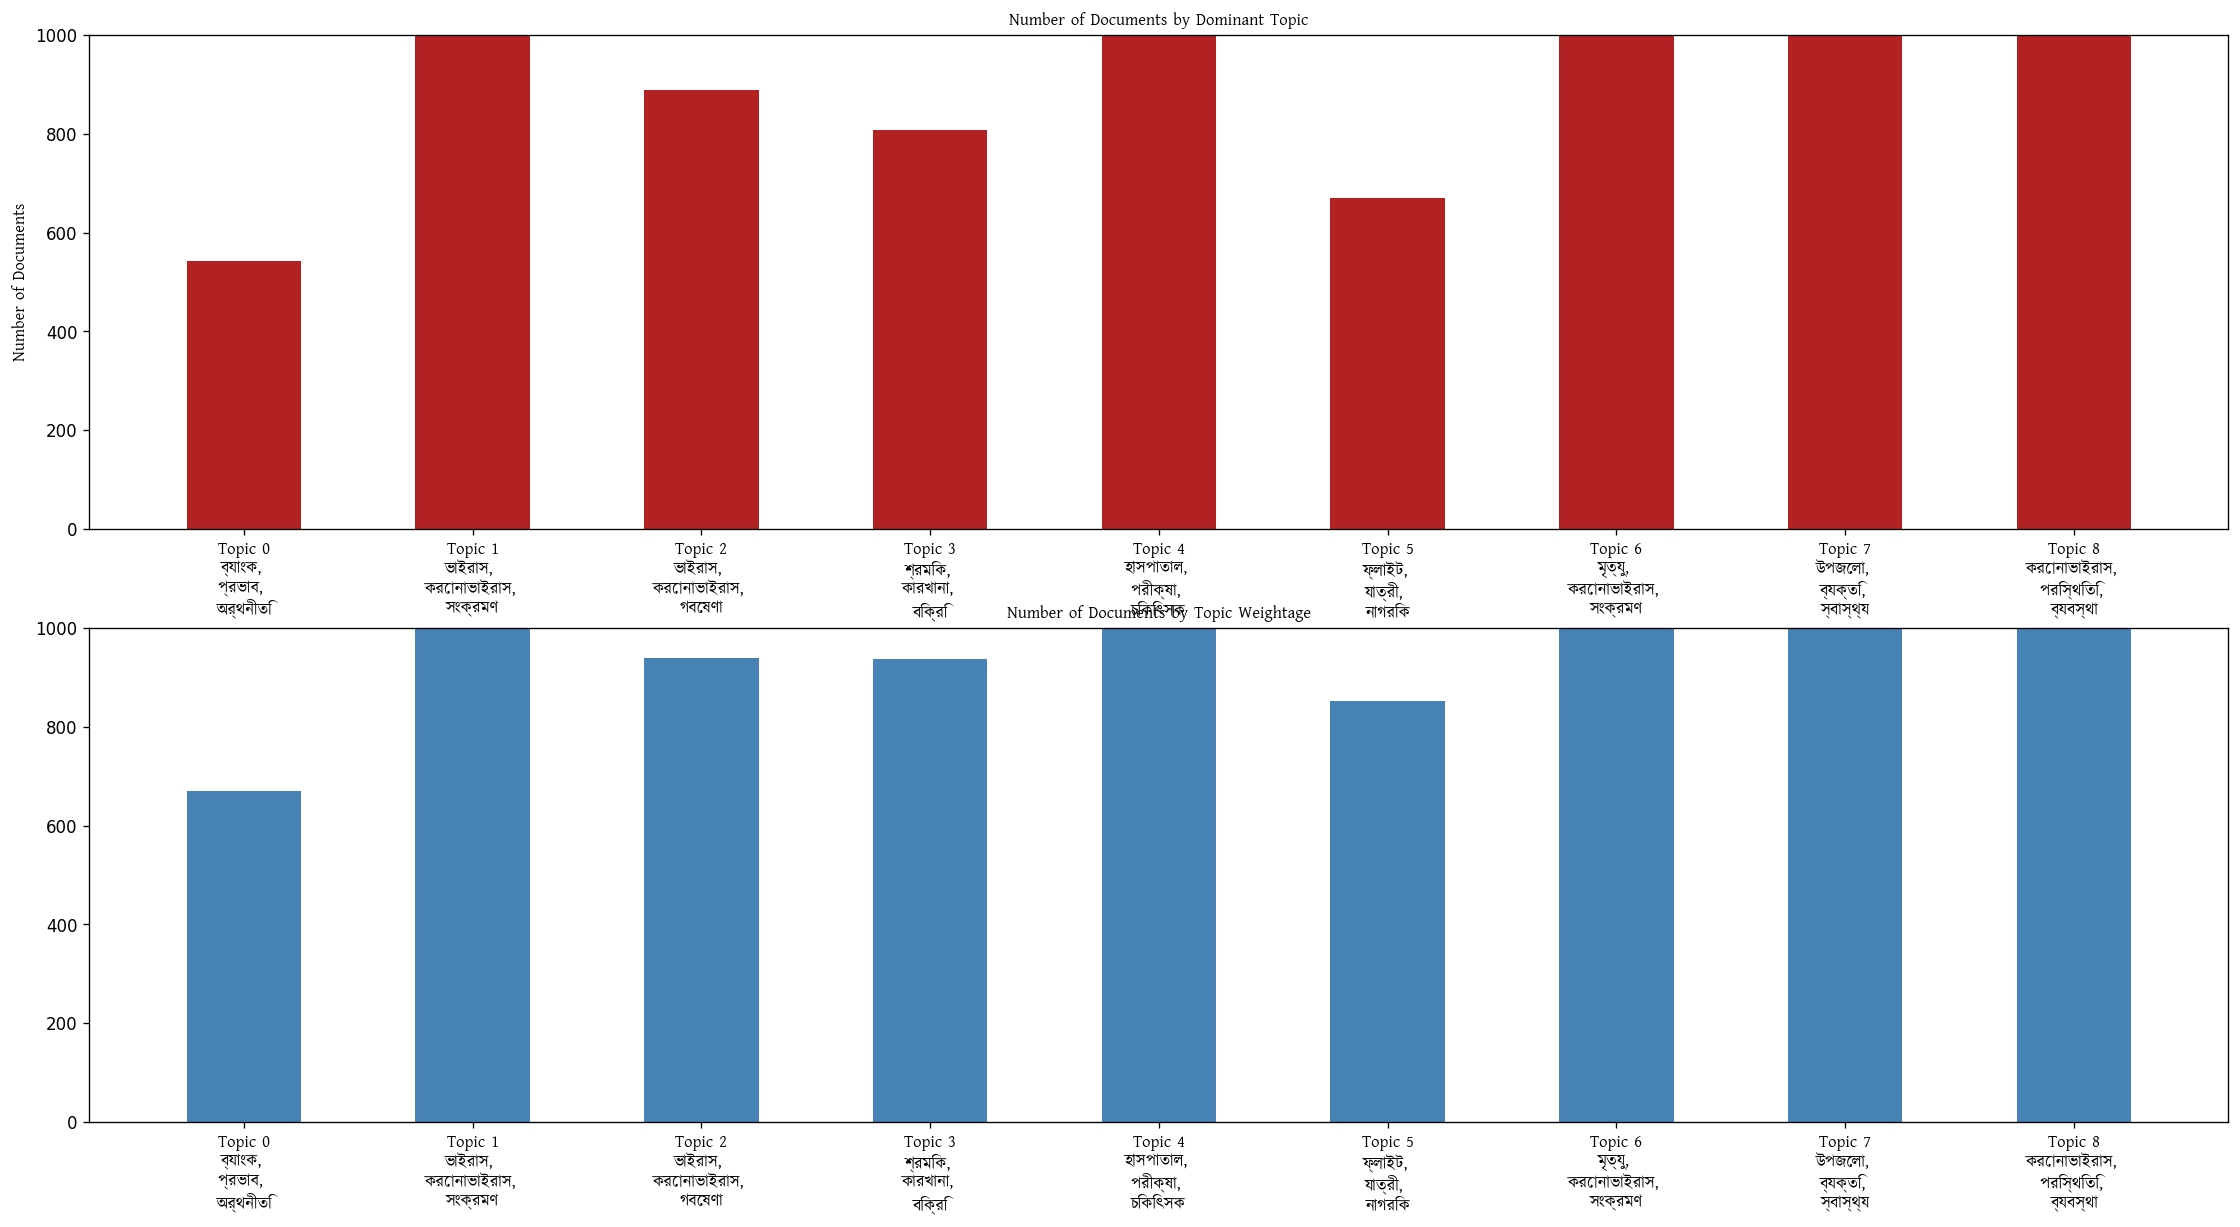

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(23, 12), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
ax1.set_xticklabels((range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__())),fontproperties=prop)

tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10),fontproperties=prop)
ax1.set_ylabel('Number of Documents',fontproperties=prop)
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
#ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_xticklabels((range(df_topic_weightage_by_doc.index.unique().__len__())),fontproperties=prop)
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10),fontproperties=prop)

fig.savefig('Nummber of Topic by Dominant Topic.png')
plt.show()

In [ ]:
# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 20
# #mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# mycolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
#   # more colors: 'mcolors.XKCD_COLORS'
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[20])
# show(plot)




# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 20
# import numpy
# mycolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
#   # more colors: 'mcolors.XKCD_COLORS'
# #mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# mycolors = numpy.asarray(mycolors)
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)


In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 9
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14482 samples in 0.018s...
[t-SNE] Computed neighbors for 14482 samples in 0.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14482
[t-SNE] Computed conditional probabilities for sample 2000 / 14482
[t-SNE] Computed conditional probabilities for sample 3000 / 14482
[t-SNE] Computed conditional probabilities for sample 4000 / 14482
[t-SNE] Computed conditional probabilities for sample 5000 / 14482
[t-SNE] Computed conditional probabilities for sample 6000 / 14482
[t-SNE] Computed conditional probabilities for sample 7000 / 14482
[t-SNE] Computed conditional probabilities for sample 8000 / 14482
[t-SNE] Computed conditional probabilities for sample 9000 / 14482
[t-SNE] Computed conditional probabilities for sample 10000 / 14482
[t-SNE] Computed conditional probabilities for sample 11000 / 14482
[t-SNE] Computed conditional probabilities for sample 12000 / 14482
[t-SNE] Computed conditional probabilities for sam

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus,id2word)
vis
 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.100324 -0.135408       1        1  26.137413
7     -0.263162  0.121061       2        1  17.109782
8      0.040801  0.059866       3        1  13.402559
4     -0.217378 -0.032760       4        1  11.743524
6     -0.124772 -0.158099       5        1   6.812102
0      0.243654 -0.042617       6        1   6.723572
2      0.038230 -0.179052       7        1   6.595028
3      0.090714  0.265094       8        1   6.080486
5      0.091590  0.101916       9        1   5.395533, topic_info=             Term          Freq         Total Category  logprob  loglift
225      হাসপাতাল  16746.000000  16746.000000  Default  30.0000  30.0000
35         উপজেলা  11716.000000  11716.000000  Default  29.0000  29.0000
548        মৃত্যু  10230.000000  10230.000000  Default  28.0000  28.0000
1375       শনাক্ত   9785.000000   9785.000000  Default  27.0000  27.0000
40    করোনাভাইরাস  25434.000000  25434.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
310      ব্যবস্থা    394.756385   5678.879200   Topic9  -5.1211   0.2534
323        সংস্থা    347.444741   4982.492536   Topic9  -5.2488   0.2565
40    করোনাভাইরাস    376.281252  25434.801167   Topic9  -5.1690  -1.2939
30      স্বাস্থ্য    329.817828  15098.992735   Topic9  -5.3008  -0.9042
922      পরিচালনা    292.777459   1225.767807   Topic9  -5.4200   1.4877

[662 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
3720       4  0.945776   অক্সিজেন
3720       7  0.052670   অক্সিজেন
26979      5  0.985821  অঙ্গরাজ্য
5499       6  0.982998     অধস্তন
0          3  0.109953   অধিদপ্তর
...      ...       ...        ...
327        7  0.408867    হ্যান্ড
327        9  0.001842    হ্যান্ড
26821      2  0.178485   হয়েছিলেন
26821      4  0.139306   হয়েছিলেন
26821      5  0.682017   হয়েছিলেন

[1355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 9, 5, 7, 1, 3, 4, 6])

In [ ]:
# from gensim.models import CoherenceModel
# #text_data = pd.read_pickle('text_data.pkl')

# number_of_topics = [5,6,7,8,9,10,11,12,13,14,15]
# perplexity_values = []
# coherence_values = []
# for k in number_of_topics:
#   lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                             id2word=id2word,
#                                             num_topics=k, 
#                                             random_state=89,
#                                             update_every=1,
#                                             passes=42,
#                                             alpha='auto',
#                                             per_word_topics=True)
#   perplexity_values.append(lda_model.log_perplexity(corpus))
#   coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=lda_model.id2word, coherence='c_v')
#   coherence_values.append(coherence_model_lda.get_coherence())

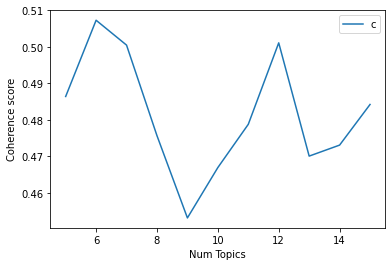

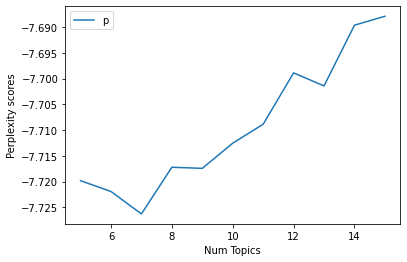

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(number_of_topics, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

# plt.plot(number_of_topics, perplexity_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Perplexity scores")
# plt.legend(("perplexity_values"), loc='best')
# plt.show()

In [ ]:
data

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category
0,https://www.thedailystar.net/coronavirus-update-in-bangladesh-highest-number-of-deaths-in-a-day-...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Statistics,NaN
1,https://www.thedailystar.net/country/news/thrown-out-job-tangails-chamcham-makers-pass-hard-days...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্মাতারা কঠিন দিন পার করছেন","Thrown out of job, Tangail’s chamcham makers pass hard days","Around 1000 workers engaged in producing chamcham, a famous delicacy of Tangail, are passing har...","As the chamcham shops are closed due to the lockdown, the workers related to the trade have beco...",COVID-19 Effects,Global economic impact of Corona virus
2,https://www.thedailystar.net/country/news/coping-covid-19-shutdown-200-families-reaping-benefits...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানের সুবিধা অর্জন করছে,Coping with Covid-19 Shutdown: 200 families reaping benefits of gardening,Family squabbles were becoming all too common in many houses where family members had been spend...,"The volunteer students, under the banner 'Sabujayan Protidhwani', have also been providing free ...",Social Information,Social impact
3,https://www.thedailystar.net/country/news/7-family-members-4-police-personnel-test-positive-covi...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ৪ জন পুলিশ সদস্য পজিটিভ পরীক্ষা করেছেন","7 family members, 4 police personnel test positive for Covid-19 in Bogura","At least eleven people tested positive for coronavirus in Bogura today. Of the 11, seven are mem...","At least eleven people tested positive for coronavirus in Bogura today.\nOf the 11, seven are me...",COVID-19 Effects,Positive patient symptoms and identification
4,https://www.thedailystar.net/coronavirus-update-health-ministry-issues-13-directives-issued-govt...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,"করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মকর্তা, কর্মচারীদের জন্য ১৩ টি নির্দেশনা জারি করে","Coronavirus: Health ministry issues 13 directives for govt officials, staffers","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...",Government Announcement and responses,"Government guidelines, instructions and mobilization"
...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/2020/01/28/867942,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing by leaps and bounds,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,Statistics,NaN
15561,https://www.kalerkantho.com/online/national/2020/01/27/867718,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,International Information,Repatriation
15562,https://www.kalerkantho.com/online/nat

In [ ]:
data['Dominant Topic'] = df_dominant_topic['Dominant_Topic'].copy()
data

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category,Dominant Topic
0,https://www.thedailystar.net/coronavirus-update-in-bangladesh-highest-number-of-deaths-in-a-day-...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Statistics,NaN,6.0
1,https://www.thedailystar.net/country/news/thrown-out-job-tangails-chamcham-makers-pass-hard-days...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্মাতারা কঠিন দিন পার করছেন","Thrown out of job, Tangail’s chamcham makers pass hard days","Around 1000 workers engaged in producing chamcham, a famous delicacy of Tangail, are passing har...","As the chamcham shops are closed due to the lockdown, the workers related to the trade have beco...",COVID-19 Effects,Global economic impact of Corona virus,3.0
2,https://www.thedailystar.net/country/news/coping-covid-19-shutdown-200-families-reaping-benefits...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানের সুবিধা অর্জন করছে,Coping with Covid-19 Shutdown: 200 families reaping benefits of gardening,Family squabbles were becoming all too common in many houses where family members had been spend...,"The volunteer students, under the banner 'Sabujayan Protidhwani', have also been providing free ...",Social Information,Social impact,0.0
3,https://www.thedailystar.net/country/news/7-family-members-4-police-personnel-test-positive-covi...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ৪ জন পুলিশ সদস্য পজিটিভ পরীক্ষা করেছেন","7 family members, 4 police personnel test positive for Covid-19 in Bogura","At least eleven people tested positive for coronavirus in Bogura today. Of the 11, seven are mem...","At least eleven people tested positive for coronavirus in Bogura today.\nOf the 11, seven are me...",COVID-19 Effects,Positive patient symptoms and identification,7.0
4,https://www.thedailystar.net/coronavirus-update-health-ministry-issues-13-directives-issued-govt...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,"করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মকর্তা, কর্মচারীদের জন্য ১৩ টি নির্দেশনা জারি করে","Coronavirus: Health ministry issues 13 directives for govt officials, staffers","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...",Government Announcement and responses,"Government guidelines, instructions and mobilization",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/2020/01/28/867942,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing by leaps and bounds,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,Statistics,NaN,5.0
15561,https://www.kalerkantho.com/online/national/2020/01/27/867718,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,International Information,Repatriation,5

In [ ]:
data['Dominant Topic'] = data['Dominant Topic'].apply(np.int64)

In [ ]:
data

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category,Dominant Topic
0,https://www.thedailystar.net/coronavirus-update-in-bangladesh-highest-number-of-deaths-in-a-day-...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infection...,Statistics,NaN,6
1,https://www.thedailystar.net/country/news/thrown-out-job-tangails-chamcham-makers-pass-hard-days...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্মাতারা কঠিন দিন পার করছেন","Thrown out of job, Tangail’s chamcham makers pass hard days","Around 1000 workers engaged in producing chamcham, a famous delicacy of Tangail, are passing har...","As the chamcham shops are closed due to the lockdown, the workers related to the trade have beco...",COVID-19 Effects,Global economic impact of Corona virus,3
2,https://www.thedailystar.net/country/news/coping-covid-19-shutdown-200-families-reaping-benefits...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানের সুবিধা অর্জন করছে,Coping with Covid-19 Shutdown: 200 families reaping benefits of gardening,Family squabbles were becoming all too common in many houses where family members had been spend...,"The volunteer students, under the banner 'Sabujayan Protidhwani', have also been providing free ...",Social Information,Social impact,0
3,https://www.thedailystar.net/country/news/7-family-members-4-police-personnel-test-positive-covi...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ৪ জন পুলিশ সদস্য পজিটিভ পরীক্ষা করেছেন","7 family members, 4 police personnel test positive for Covid-19 in Bogura","At least eleven people tested positive for coronavirus in Bogura today. Of the 11, seven are mem...","At least eleven people tested positive for coronavirus in Bogura today.\nOf the 11, seven are me...",COVID-19 Effects,Positive patient symptoms and identification,7
4,https://www.thedailystar.net/coronavirus-update-health-ministry-issues-13-directives-issued-govt...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,"করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মকর্তা, কর্মচারীদের জন্য ১৩ টি নির্দেশনা জারি করে","Coronavirus: Health ministry issues 13 directives for govt officials, staffers","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...","In an effort to contain the spread of coronovirus, the health ministry today issued a 13-point d...",Government Announcement and responses,"Government guidelines, instructions and mobilization",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/2020/01/28/867942,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing by leaps and bounds,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্রতিরোধমূলক ব্যবস্থা গ্রহণ সত্ত্বেও এক দিনের ব্যবধা...,Statistics,NaN,5
15561,https://www.kalerkantho.com/online/national/2020/01/27/867718,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী নাগরিককে ভারতে ঢুকতে দেয়নি সেখানকার ইমিগ্রেশন পুলিশ...,International Information,Repatriation,5
15562,https

In [ ]:
data.to_pickle('NewspaperBD.pkl')